In [1]:
import pandas as pd
train_stop = pd.read_csv('../data/curated/train_distance_duration.csv')
school = pd.read_csv('../data/curated/school_distance_duration.csv')
mall = pd.read_csv('../data/curated/mall_distances_durations(final).csv')
park = pd.read_csv('../data/curated/park_distances_durations(final).csv')
CBD = pd.read_csv('../data/curated/cbd_distances_durations(final).csv')
rent = pd.read_csv('../rent_data/rent_cleaned.csv')
train_stop_extra = pd.read_csv('../data/curated/train_distance_duration(extra).csv')
school_extra = pd.read_csv('../data/curated/school_distances_durations(extra).csv')
mall_extra = pd.read_csv('../data/curated/mall_distances_durations(extra).csv')
park_extra = pd.read_csv('../data/curated/park_distances_durations(extra).csv')
CBD_extra = pd.read_csv('../data/curated/cbd_distances_durations(extra).csv')
rent_extra = pd.read_csv('../rent_data/rent_extra.csv')
population_growth = pd.read_csv('../data/curated/population_postcode.csv')
affluence = pd.read_csv('../data/curated/VIC_weekly_income_poa.csv')

In [2]:
train_stop = pd.concat([train_stop, train_stop_extra])
school = pd.concat([school, school_extra])
park = pd.concat([park, park_extra])
mall = pd.concat([mall, mall_extra])
CBD = pd.concat([CBD, CBD_extra])
rent = pd.concat([rent, rent_extra])

In [3]:
train_stop

,Unnamed: 0,rent_address,stop_name,min_distance,min_duration,postcode,price
0,0,unit-1713-200-spencer-st-melbourne-vic-3000-16...,Southern Cross Railway Station (Melbourne City),1397.94,150.39,3000,440.0
1,1,217-339-swanston-st-melbourne-vic-3000-16055041,Southern Cross Railway Station (Melbourne City),2893.41,340.08,3000,380.0
2,2,101-25-33-wills-street-melbourne-vic-3000-1486...,Southern Cross Railway Station (Melbourne City),2353.80,286.39,3000,400.0
3,3,2905b-11-rose-lane-melbourne-vic-3000-16074279,Southern Cross Railway Station (Melbourne City),1539.84,181.05,3000,575.0
4,4,502-118-russell-street-melbourne-vic-3000-1609...,Southern Cross Railway Station (Melbourne City),2618.15,319.70,3000,620.0
...,...,...,...,...,...,...,...
914,914,9-oakley-street-mount-dandenong-vic-3767-16111799,Nar Nar Goon Railway Station (Nar Nar Goon),47388.73,3325.33,3767,500.0
915,915,30-beluga-street-mount-eliza-vic-3930-16104711,NaN,NaN,NaN,3930,1900.0
916,916,71-balcombe-drive-mount-martha-vic-3934-16113110,NaN,NaN,NaN,3934,950.0
917,917,4-cirrus-close-hampton-park-vic-3976-16112856,Nar Nar Goon Railway Station (Nar Nar Goon),30036.18,2073.70,3976,420.0


In [4]:
CBD.shape

(2139, 6)

In [5]:
rent.shape

(2139, 14)

In [6]:
affluence

,Unnamed: 0,Postcode,SA2 name,Median weekly income in 2014,Median weekly income in 2015,Median weekly income in 2016,Median weekly income in 2017,Median weekly income in 2018,Median weekly income in 2019,Median weekly income in 2020,Median weekly income in 2021,Median weekly income in 2022,Median weekly income in 2023,Median weekly income in 2024,Median weekly income in 2025
0,0,3000,Melbourne,628.79,600.81,539.77,553.96,577.38,566.20,555.22,544.46,533.91,523.56,513.42,503.47
1,1,3001,Melbourne,628.79,600.81,539.77,553.96,577.38,566.20,555.22,544.46,533.91,523.56,513.42,503.47
2,2,8001,Melbourne,628.79,600.81,539.77,553.96,577.38,566.20,555.22,544.46,533.91,523.56,513.42,503.47
3,3,8003,Melbourne,628.79,600.81,539.77,553.96,577.38,566.20,555.22,544.46,533.91,523.56,513.42,503.47
4,4,8006,Melbourne,628.79,600.81,539.77,553.96,577.38,566.20,555.22,544.46,533.91,523.56,513.42,503.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,711,3991,Wonthaggi - Inverloch,698.38,695.37,701.85,731.92,767.00,785.36,804.17,823.42,843.14,863.33,884.00,905.17
712,712,3992,Wonthaggi - Inverloch,698.38,695.37,701.85,731.92,767.00,785.36,804.17,823.42,843.14,863.33,884.00,905.17
713,713,3995,Wonthaggi - Inverloch,698.38,695.37,701.85,731.92,767.00,785.36,804.17,823.42,843.14,863.33,884.00,905.17
714,714,3996,Wonthaggi - Inverloch,698.38,695.37,701.85,731.92,767.00,785.36,804.17,823.42,843.14,863.33,884.00,905.17


In [7]:
rent = rent.rename(columns={'listingSlug':'rent_address'})
rent_1bathroom = rent[rent.bathrooms == 1]
rent_2bedroom = rent_1bathroom[rent_1bathroom.bedrooms == 2]
rent_1car_1bathroom_2bedrooms = rent_2bedroom[rent_2bedroom.carspaces == 1]
print(rent_1car_1bathroom_2bedrooms.shape)

(477, 14)


Inverse index

In [8]:
park["min_duration"]=1/(park["min_duration"]/60)
mall["min_duration"]=1/(mall["min_duration"]/60)
school["min_duration"]=1/(school["min_duration"]/60)
train_stop["min_duration"]=1/(train_stop["min_duration"]/60)
CBD["min_duration"]=1/(CBD["min_duration"]/60)

In [9]:
park["min_distance"]=1/park["min_distance"]
mall["min_distance"]=1/mall["min_distance"]
school["min_distance"]=1/school["min_distance"]
train_stop["min_distance"]=1/train_stop["min_distance"]
CBD["min_distance"]=1/CBD["min_distance"]

Rename Column name

In [10]:
school = school.rename(columns={'min_distance':'school_distance(m)', 'min_duration':'school_duration(min)'})
mall = mall.rename(columns={'min_distance':'mall_distance(m)', 'min_duration':'mall_duration(min)'})
park = park.rename(columns={'min_distance':'park_distance(m)', 'min_duration':'park_duration(min)'})
train_stop = train_stop.rename(columns={'min_distance':'train_stop_distance(m)', 'min_duration':'train_stop_duration(min)'})
population_growth = population_growth.rename(columns={'Postcode':'postcode','average change %':'population_growth_rate','2022':'population predicted in 2022'})
CBD = CBD.rename(columns={'min_distance':'CBD_distance(m)', 'min_duration':'CBD_duration(min)'})
affluence = affluence.rename(columns={'Postcode':'postcode'})

In [11]:
population_growth

,Unnamed: 0,postcode,SA2 name,S/T name,2001,2002,2003,2004,2005,2006,...,population density 2016,population density 2017,population density 2018,population density 2019,population density 2020,population density 2021,population density 2022,population density 2023,population density 2024,population density 2025
0,0,3002,East Melbourne,Victoria,3731,3859,4243,4460,4495,4555,...,1888.0,1895.0,1865.0,1867.0,1854.0,1711.0,1737.0,1762.0,1789.0,1815.0
1,1,8002,East Melbourne,Victoria,3731,3859,4243,4460,4495,4555,...,1888.0,1895.0,1865.0,1867.0,1854.0,1711.0,1737.0,1762.0,1789.0,1815.0
2,2,3005,Docklands,Victoria,154,926,1913,3089,3779,4152,...,4930.0,5801.0,6433.0,6823.0,6949.0,6642.0,9448.0,13437.0,19111.0,27182.0
3,3,3008,Docklands,Victoria,154,926,1913,3089,3779,4152,...,4930.0,5801.0,6433.0,6823.0,6949.0,6642.0,9448.0,13437.0,19111.0,27182.0
4,4,8012,Docklands,Victoria,154,926,1913,3089,3779,4152,...,4930.0,5801.0,6433.0,6823.0,6949.0,6642.0,9448.0,13437.0,19111.0,27182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,593,3991,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,18359,...,31.0,32.0,33.0,34.0,35.0,37.0,37.0,38.0,39.0,40.0
594,594,3992,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,18359,...,31.0,32.0,33.0,34.0,35.0,37.0,37.0,38.0,39.0,40.0
595,595,3995,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,18359,...,31.0,32.0,33.0,34.0,35.0,37.0,37.0,38.0,39.0,40.0
596,596,3996,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,18359,...,31.0,32.0,33.0,34.0,35.0,37.0,37.0,38.0,39.0,40.0


Calculate average of diatance and duration

In [12]:
school = school[['postcode', 'school_distance(m)', 'school_duration(min)']].groupby('postcode').mean()
school = school.reset_index(drop=False)
mall = mall[['postcode', 'mall_distance(m)', 'mall_duration(min)']].groupby('postcode').mean()
mall = mall.reset_index(drop=False)
park = park[['postcode', 'park_distance(m)', 'park_duration(min)']].groupby('postcode').mean()
park = park.reset_index(drop=False)
CBD = CBD[['postcode', 'CBD_distance(m)', 'CBD_duration(min)']].groupby('postcode').mean()
CBD = CBD.reset_index(drop=False)
train_stop = train_stop[['postcode', 'train_stop_distance(m)', 'train_stop_duration(min)']].groupby('postcode').mean()
train_stop = train_stop.reset_index(drop=False)

Merge each external feature with mean value

In [13]:
rent_school = pd.merge(rent_1car_1bathroom_2bedrooms, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population density 2022']],affluence[['postcode','Median weekly income in 2022']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
train_cbd = pd.merge(train_stop, CBD, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_cbd, how='inner', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='inner', on='postcode')

In [14]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)
print(population_forecast_affluence.shape)

(477, 16)
(163, 5)
(477, 20)
(477, 24)
(302, 26)
(571, 3)


In [15]:
external_feature

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,...,mall_distance(m),mall_duration(min),park_distance(m),park_duration(min),train_stop_distance(m),train_stop_duration(min),CBD_distance(m),CBD_duration(min),population density 2022,Median weekly income in 2022
0,20,420.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
1,967,625.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
2,280,600.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
3,295,490.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
4,621,495.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,563,380.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,CLAYTON SOUTH,3169,...,0.000223,0.108064,0.000226,0.122390,0.000038,0.029651,0.000041,0.029711,1842.0,1059.19
298,623,425.0,VIC,ApartmentUnitFlat,1,2,1,Eastern Suburbs,RINGWOOD EAST,3135,...,0.000451,0.261757,0.000237,0.152979,0.000032,0.029486,0.000030,0.026410,2288.0,1171.37
299,693,500.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,WILLIAMSTOWN NORTH,3016,...,0.000137,0.085314,0.000778,0.372647,0.000080,0.052172,0.000075,0.048194,2217.0,1388.83
300,844,595.0,VIC,House,1,2,1,Melbourne Region,FITZROY,3065,...,0.000545,0.230825,0.000823,0.310195,0.000213,0.101934,0.000142,0.070786,7672.0,1363.90


In [16]:
external_feature.iloc[:,1:].to_csv('../data/curated/feature_selection.csv')

Correlation map with 2 bedroom

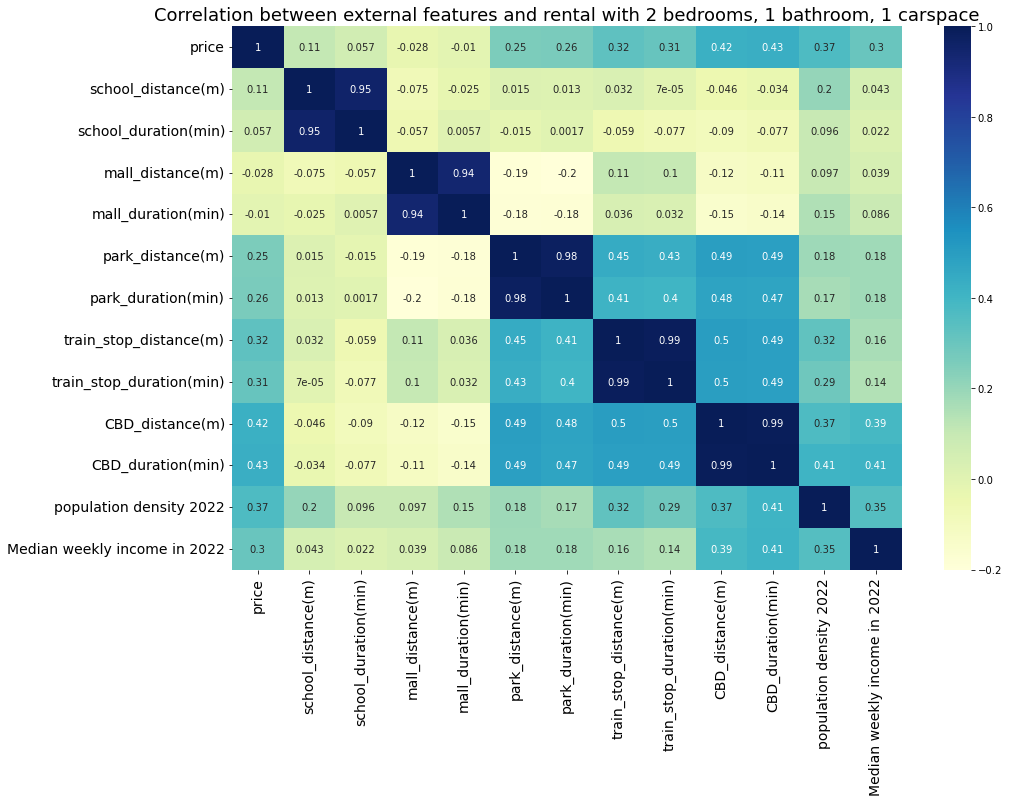

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)","CBD_distance(m)","CBD_duration(min)",'population density 2022','Median weekly income in 2022']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features and rental with 2 bedrooms, 1 bathroom, 1 carspace",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../plots/external_correlation.png")
plt.show()